In [2]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive

In [3]:
drive.mount('/gdrive', force_remount=True)
dataset_path = "/gdrive/MyDrive/dataset/flower/train"

train_ds = tf.keras.utils.image_dataset_from_directory(
  dataset_path,
  validation_split=0.1,
  subset="training",
  seed=123,
  image_size=(224, 224),
  )

val_ds = tf.keras.utils.image_dataset_from_directory(
  dataset_path,
  validation_split=0.1,
  subset="validation",
  seed=123,
  image_size=(224, 224),
  )

data_augmentation = tf.keras.Sequential(
  [
    layers.RandomFlip("horizontal", input_shape=(224,224,3)),
    layers.RandomRotation(factor=(-0.2,0.2)),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.1),
    layers.RandomTranslation(0.1,0.1)
  ]
)

Mounted at /gdrive
Found 1020 files belonging to 17 classes.
Using 918 files for training.
Found 1020 files belonging to 17 classes.
Using 102 files for validation.


In [ ]:
# AUTOTUNE = tf.data.AUTOTUNE

# train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
# val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [37]:
aug_model = models.Sequential([
    data_augmentation,
    layers.Rescaling(1./255,  input_shape=(224, 224,3)),
    # layers.Conv2D(64, kernel_size=(3,3), strides=(1,1), padding="same", activation="relu"),
    layers.Conv2D(64, kernel_size=(3,3), strides=(1,1), padding="same", activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(128, kernel_size=(3,3), strides=(1,1),padding="same", activation="relu"),
    # layers.Conv2D(128, kernel_size=(3,3), strides=(1,1),padding="same", activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(256, kernel_size=(3,3), strides=(1,1),padding="same", activation="relu"),
    layers.MaxPooling2D(),

    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(256, activation="relu"),
    layers.Dense(17, activation="softmax"),
])

In [38]:
aug_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
              loss = tf.keras.losses.sparse_categorical_crossentropy,
              metrics = ['accuracy'])

history = aug_model.fit(train_ds, validation_data=val_ds, epochs=25)


Epoch 1/25
29/29 [==============================] - 10s 209ms/step - loss: 2.8666 - accuracy: 0.1002 - val_loss: 2.2315 - val_accuracy: 0.2353
Epoch 2/25
29/29 [==============================] - 7s 209ms/step - loss: 2.3313 - accuracy: 0.2004 - val_loss: 1.9532 - val_accuracy: 0.3039
Epoch 3/25
29/29 [==============================] - 6s 200ms/step - loss: 2.0528 - accuracy: 0.2658 - val_loss: 1.7507 - val_accuracy: 0.3922
Epoch 4/25
29/29 [==============================] - 7s 208ms/step - loss: 1.9002 - accuracy: 0.3181 - val_loss: 1.7551 - val_accuracy: 0.3824
Epoch 5/25
29/29 [==============================] - 7s 211ms/step - loss: 1.8019 - accuracy: 0.3486 - val_loss: 1.6545 - val_accuracy: 0.3922
Epoch 6/25
29/29 [==============================] - 6s 198ms/step - loss: 1.6360 - accuracy: 0.3976 - val_loss: 1.4411 - val_accuracy: 0.4608
Epoch 7/25
29/29 [==============================] - 19s 642ms/step - loss: 1.5643 - accuracy: 0.4412 - val_loss: 1.2928 - val_accuracy: 0.5294
Epoc

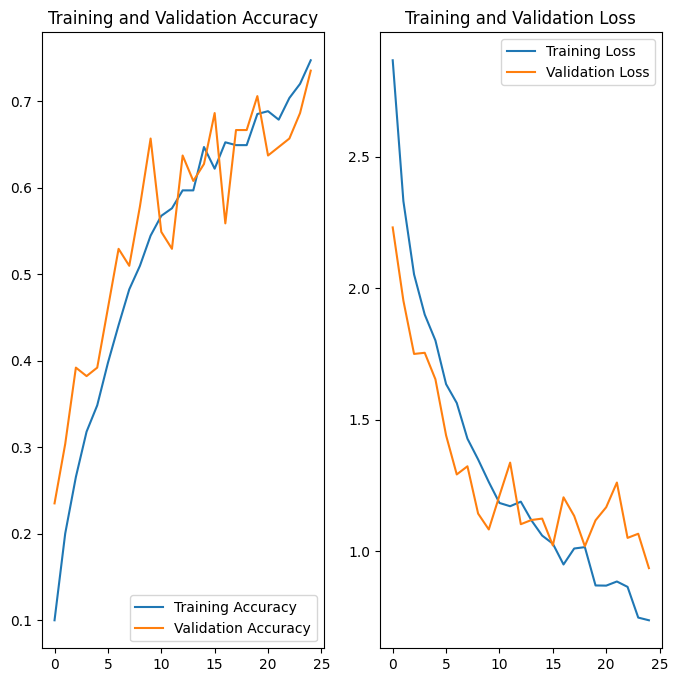

In [39]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(25)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [51]:
drive.mount('/gdrive', force_remount=True)
aug_model.save('/gdrive/MyDrive/dataset/flower_aug1.h5')

Mounted at /gdrive


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [41]:
Y_true = []
Y_pred = []

for images, labels in val_ds:
    for image in images:
        # X.append(image)                    # append tensor
        image = np.expand_dims(image, axis=0)
        prediction=aug_model.predict(image)
        Y_true.append(np.argmax(prediction))
        #X.append(image.numpy())           # append numpy.array
        #X.append(image.numpy().tolist())  # append list
    for label in labels:
        # Y.append(label)                    # append tensor
        #Y.append(label.numpy())           # append numpy.array
        Y_pred.append(label.numpy().tolist())  # append list
print(f'Y_true:  {Y_true}\nY_pred: {Y_pred}')

1/1 [==============================] - 0s 17ms/step
Y_true:  [6, 14, 2, 8, 14, 12, 6, 10, 11, 0, 5, 6, 7, 9, 6, 7, 14, 6, 13, 7, 6, 10, 1, 8, 6, 3, 9, 12, 9, 10, 10, 1, 6, 13, 0, 12, 5, 1, 2, 13, 3, 1, 5, 14, 10, 3, 9, 12, 10, 7, 4, 15, 1, 3, 0, 16, 2, 2, 10, 1, 2, 9, 8, 1, 2, 16, 9, 13, 7, 13, 14, 16, 16, 9, 1, 16, 9, 8, 0, 16, 7, 12, 0, 7, 1, 10, 5, 0, 5, 16, 6, 0, 3, 14, 0, 14, 6, 14, 4, 5, 13, 2]
Y_pred: [6, 14, 2, 8, 14, 12, 6, 11, 11, 0, 15, 6, 7, 9, 6, 2, 14, 6, 13, 7, 6, 10, 2, 8, 6, 1, 4, 12, 9, 10, 8, 1, 6, 13, 0, 12, 5, 7, 2, 13, 15, 3, 5, 14, 12, 10, 9, 12, 10, 7, 4, 13, 3, 3, 4, 16, 2, 5, 16, 1, 2, 9, 8, 1, 5, 16, 9, 13, 7, 13, 14, 16, 16, 9, 1, 12, 9, 8, 0, 16, 3, 10, 9, 1, 1, 6, 1, 0, 3, 16, 6, 0, 3, 14, 4, 14, 6, 14, 4, 5, 13, 2]


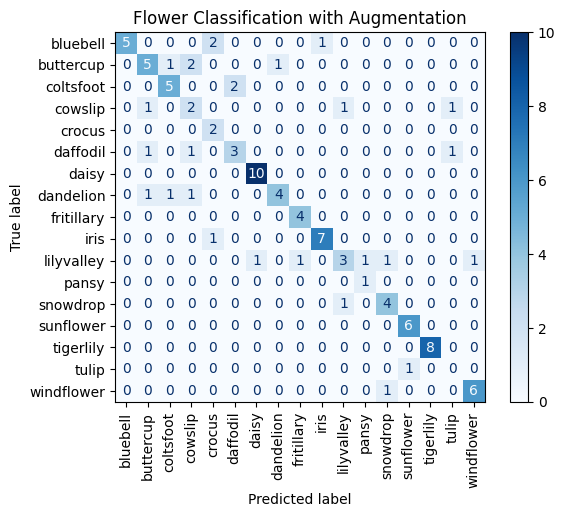

In [42]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

labels =val_ds.class_names

cm = confusion_matrix(Y_true, Y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

disp.plot(cmap=plt.cm.Blues,xticks_rotation=90)
plt.title("Flower Classification with Augmentation")
# plt.savefig('output/confusionmatric_floweraug.jpg')
plt.show()

In [43]:
import cv2
import numpy as np

labels = ['bluebell', 'buttercup', 'coltsfoot', 'cowslip', 'crocus', 'daffodil', 'daisy', 'dandelion', 'fritillary', 'iris', 'lilyvalley', 'pansy', 'snowdrop', 'sunflower', 'tigerlily', 'tulip', 'windflower']
drive.mount('/gdrive', force_remount=True)
model11 = tf.keras.models.load_model('/gdrive/MyDrive/dataset/flower_aug1.h5')




Mounted at /gdrive


In [50]:
user_image = cv2.imread('/gdrive/MyDrive/dataset/flower/test/snowdrop/image_0110.jpg')
user_image = cv2.cvtColor(user_image,cv2.COLOR_BGR2RGB)
user_image = cv2.resize(user_image, (224,224))

# # user_image = user_image/255

# user_image = user_image.reshape(1,224,224,3)
user_image = np.expand_dims(user_image, axis=0)
result = model11.predict(user_image)
print(result)
out = np.argmax(result)
print(labels[out])
out

1/1 [==============================] - 0s 29ms/step
[[6.9453190e-03 2.6114496e-06 8.0341146e-05 2.4843740e-04 1.5830267e-02
  1.4411594e-04 1.5502814e-03 4.9724451e-07 1.4246018e-02 1.5918687e-03
  2.0197137e-01 8.1179023e-04 7.3329490e-01 1.0112600e-06 4.9444421e-05
  1.1970083e-03 2.2034690e-02]]
snowdrop


12